<a href="https://colab.research.google.com/github/aminrezanejad20/BERT-for-just-in-time-defect-prediction/blob/main/BERT_for_JIT_defect_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BERT For Just In Time Defect Prediction

#Loading Data

In [1]:
import pickle

with open('/content/qt_train.pkl', 'rb') as f:
    train_data = pickle.load(f)

with open('/content/qt_test.pkl', 'rb') as f:
    test_data = pickle.load(f)

print("Train data sample:", train_data[0])
print("Test data sample:", test_data[0])

Train data sample: ['2380765a2b4563bc714f947927d2cd48e2bbb49d', '32758d917e3a7fd0d2e344d89d9ccaf0361326d8', 'be4db73231611d27522aab41840de9daafae9079', '7371bac96ba0962b79b59994e4e9b9adf4ee17e8', '9ee07d5544f0194cb7dd58e4383d25a08226acde', '0194fa135b1d84a8c8d70ed8a0ff46eef0289fb7', '0d7c0661a538896c94a3493d9c97fca07cc526d7', '087edaae102a0ff84583c9346acb359e9ea8478d', 'cfa5c1698d357adb6c20716e60d51dc41c55ab7e', 'c8fdb0541b047b73413aa67d4f5aece539e98347', '42fcc4d413424cecb7aa0be2b8cc2503b42fe408', '2b205db8514c0d64880edd77404b96460e5226bc', '3192cd88c569b1052c74981329248fbc60f98535', 'a8d3802938df60a74990c2c915446061b047057d', '7a6c0f0673a239dd84614281f163dd7da1ad1f7a', 'f50153e6c6726a06f246f54f1dfe7842d95b5ed9', '477c43260eea8461dff1e0e8acb4b61a1600518a', '3c53da05229789295cbf75174844c2b3df3db25c', '57ba98d24f3cb953b59aa33fd7c433b82d47722f', 'b566c9121c066669a88f01143034078ae0cccc90', '2983cb9531d47e5826540ca79e3066a8ed0db30c', '86a31a3dff5fc6848f9a9a7b5798fb87e86b1fe1', '5efcde65173

In [2]:
num_train_samples = len(train_data[0])
num_test_samples = len(test_data[0])

total_samples = num_train_samples + num_test_samples

train_percentage = (num_train_samples / total_samples) * 100
test_percentage = (num_test_samples / total_samples) * 100

print(f"Number of training samples: {num_train_samples}")
print(f"Number of test samples: {num_test_samples}")
print(f"Total number of samples: {total_samples}")
print(f"Training data percentage: {train_percentage:.2f}%")
print(f"Test data percentage: {test_percentage:.2f}%")

Number of training samples: 23133
Number of test samples: 2571
Total number of samples: 25704
Training data percentage: 90.00%
Test data percentage: 10.00%


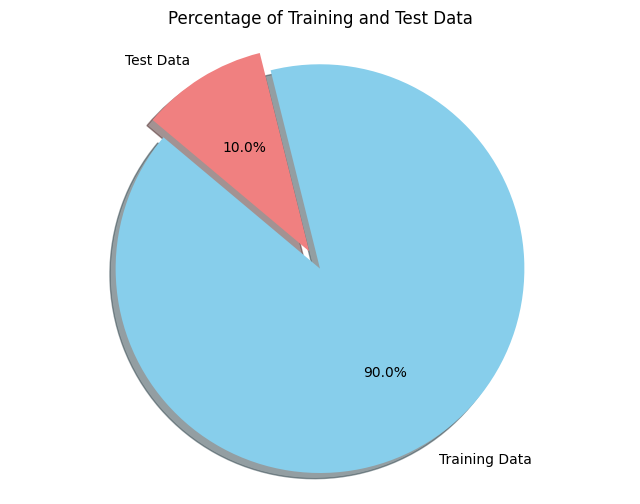

In [3]:
import matplotlib.pyplot as plt

labels = ['Training Data', 'Test Data']
sizes = [train_percentage, test_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Training and Test Data')
plt.show()

Train Data:
Label 0: 21491 samples, 92.90%
Label 1: 1642 samples, 7.10%

Test Data:
Label 0: 2388 samples, 92.88%
Label 1: 183 samples, 7.12%


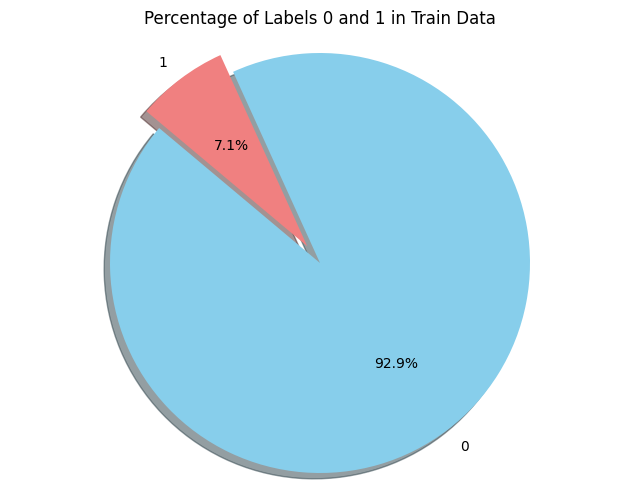

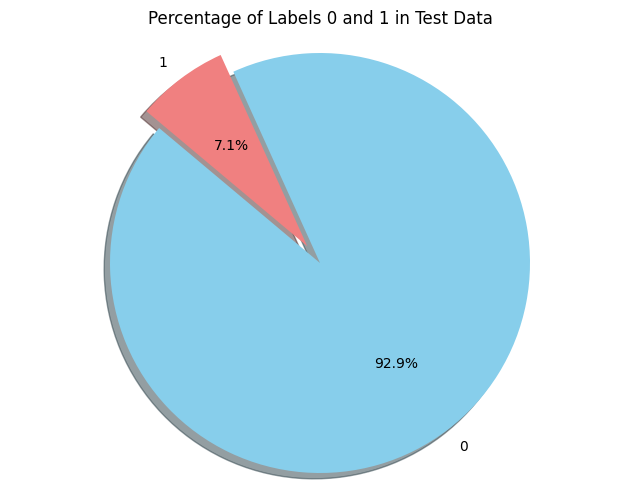

In [4]:
from collections import Counter

def calculate_label_percentages(labels):
    label_counts = Counter(labels)

    total_labels = len(labels)
    label_percentages = {label: (count / total_labels) * 100 for label, count in label_counts.items()}

    return label_counts, label_percentages

def plot_label_percentages(label_percentages, title):
    labels = list(label_percentages.keys())
    sizes = list(label_percentages.values())
    colors = ['skyblue', 'lightcoral']
    explode = (0.1, 0) if 0 in labels else (0, 0.1)  # برجسته کردن بخش 0

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

with open('qt_train.pkl', 'rb') as f:
    train_data = pickle.load(f)

with open('qt_test.pkl', 'rb') as f:
    test_data = pickle.load(f)

train_labels = train_data[1]
test_labels = test_data[1]

train_label_counts, train_label_percentages = calculate_label_percentages(train_labels)

test_label_counts, test_label_percentages = calculate_label_percentages(test_labels)

print("Train Data:")
for label, percentage in train_label_percentages.items():
    print(f"Label {label}: {train_label_counts[label]} samples, {percentage:.2f}%")

print("\nTest Data:")
for label, percentage in test_label_percentages.items():
    print(f"Label {label}: {test_label_counts[label]} samples, {percentage:.2f}%")

plot_label_percentages(train_label_percentages, 'Percentage of Labels 0 and 1 in Train Data')

plot_label_percentages(test_label_percentages, 'Percentage of Labels 0 and 1 in Test Data')

In [5]:
print(type(train_data))

<class 'tuple'>


In [6]:
print(type(test_data))

<class 'tuple'>


In [7]:
print("Length of tuple:", len(train_data))

Length of tuple: 4


In [8]:
print("Length of tuple:", len(test_data))

Length of tuple: 4


In [9]:
for i, item in enumerate(train_data):
    print(f"Type of element {i}: {type(item)}")
    if isinstance(item, (list, tuple)):
        print(f"Sample items from element {i}:", item[:5])
    else:
        print(f"Content of element {i}:", item)
    if i == 2:
        break

Type of element 0: <class 'list'>
Sample items from element 0: ['2380765a2b4563bc714f947927d2cd48e2bbb49d', '32758d917e3a7fd0d2e344d89d9ccaf0361326d8', 'be4db73231611d27522aab41840de9daafae9079', '7371bac96ba0962b79b59994e4e9b9adf4ee17e8', '9ee07d5544f0194cb7dd58e4383d25a08226acde']
Type of element 1: <class 'list'>
Sample items from element 1: [0, 0, 0, 0, 0]
Type of element 2: <class 'list'>
Sample items from element 2: ['fix qfile : :permissions for long filenames when qt_ntfs_permission_lookup is used , qfile : :permissions failed for files with long filenames . also created a test case for this api , which revealed another bug . task-number : qtbug-25629 change-id : i73b7676a9d059c0e782b3f701b2e6bbc92f671ed reviewed-by : prasanth ullattil < prasanth.ullattil @ nokia.com >', 'move some compiler macro definitions into the compiler sections makes for a couple of cleaner definitions of fallbacks . change-id : i9b1a6f77bab986514e1862ae1f431ea37b89c1b5 reviewed-by : olivier goffart < og

In [10]:
num_samples = len(train_data[0])
print("Number of samples:", num_samples)

Number of samples: 23133


In [11]:
num_samples = len(test_data[0])
print("Number of samples:", num_samples)

Number of samples: 2571


In [12]:
commit_ids = train_data[0]
labels = train_data[1]
messages = train_data[2]

print("\nSample commit IDs:", commit_ids[:5])
print("\nSample labels:", labels[:5])
print("\nSample messages:", messages[:5])


Sample commit IDs: ['2380765a2b4563bc714f947927d2cd48e2bbb49d', '32758d917e3a7fd0d2e344d89d9ccaf0361326d8', 'be4db73231611d27522aab41840de9daafae9079', '7371bac96ba0962b79b59994e4e9b9adf4ee17e8', '9ee07d5544f0194cb7dd58e4383d25a08226acde']

Sample labels: [0, 0, 0, 0, 0]

Sample messages: ['fix qfile : :permissions for long filenames when qt_ntfs_permission_lookup is used , qfile : :permissions failed for files with long filenames . also created a test case for this api , which revealed another bug . task-number : qtbug-25629 change-id : i73b7676a9d059c0e782b3f701b2e6bbc92f671ed reviewed-by : prasanth ullattil < prasanth.ullattil @ nokia.com >', 'move some compiler macro definitions into the compiler sections makes for a couple of cleaner definitions of fallbacks . change-id : i9b1a6f77bab986514e1862ae1f431ea37b89c1b5 reviewed-by : olivier goffart < ogoffart @ woboq.com >', 'doc : language corrections qstorageinfo class task-number : qtbug-40984 change-id : idf8c6ecedb25f6c55b3fe8db69

In [13]:
print("First 10 commit IDs:", commit_ids[:10])
print("\nFirst 10 labels:", labels[:10])
print("\nFirst 10 messages:", messages[:10])

First 10 commit IDs: ['2380765a2b4563bc714f947927d2cd48e2bbb49d', '32758d917e3a7fd0d2e344d89d9ccaf0361326d8', 'be4db73231611d27522aab41840de9daafae9079', '7371bac96ba0962b79b59994e4e9b9adf4ee17e8', '9ee07d5544f0194cb7dd58e4383d25a08226acde', '0194fa135b1d84a8c8d70ed8a0ff46eef0289fb7', '0d7c0661a538896c94a3493d9c97fca07cc526d7', '087edaae102a0ff84583c9346acb359e9ea8478d', 'cfa5c1698d357adb6c20716e60d51dc41c55ab7e', 'c8fdb0541b047b73413aa67d4f5aece539e98347']

First 10 labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

First 10 messages: ['fix qfile : :permissions for long filenames when qt_ntfs_permission_lookup is used , qfile : :permissions failed for files with long filenames . also created a test case for this api , which revealed another bug . task-number : qtbug-25629 change-id : i73b7676a9d059c0e782b3f701b2e6bbc92f671ed reviewed-by : prasanth ullattil < prasanth.ullattil @ nokia.com >', 'move some compiler macro definitions into the compiler sections makes for a couple of cleaner definition

In [14]:
print("Last 10 commit IDs:", commit_ids[-10:])
print("\nLast 10 labels:", labels[-10:])
print("\nLast 10 messages:", messages[-10:])

Last 10 commit IDs: ['5ec5ce354904d35c013512a1d38c24502e298657', '003d294cd6cd0567a24cddb7e27ba5880fd2a599', '2eccb1888901f6fbd1d10e0eba925c0affc83b42', '380de7f8e70cfa5f335a065e446dc707d416c1a6', 'c3dd4b834a7c51264ecb0f5659f9689cbb7384cb', '2b0f02aa5cc0f7d1b460d2d324d5d08c6f6d61b9', 'dcf12533b73235e1096a3f9f9d5fcf6c42622341', '723ae1c9502af30889e1edd5d0a2d5800bbd42d8', '214d4a70bec89b640a35bbdec7fdd4e5d32e5873', '88fb1273315b2bfde42b421ea39624d95850c7eb']

Last 10 labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Last 10 messages: ['return all expected paths in qstandardpaths : :standardlocations applicationslocation and datalocation were returning only the local path , rather than system paths + local path . change-id : i653d14e5bbe1e08c5fa1ecd5a6106336d1cd0369 reviewed-by : thiago macieira < thiago.macieira @ intel.com >', 'clean up specdir ( ) the only callers which used non-default arguments are gone now , so remove the arguments entirely . this also enables us to re-enable result caching .

In [15]:
print(f"Train data structure: {type(train_data)}")
print(f"Length of train data: {len(train_data)}")
for i, item in enumerate(train_data):
    print(f"Type of element {i}: {type(item)}")
    if isinstance(item, list):
        print(f"Sample items from element {i}: {item[:5]}")

Train data structure: <class 'tuple'>
Length of train data: 4
Type of element 0: <class 'list'>
Sample items from element 0: ['2380765a2b4563bc714f947927d2cd48e2bbb49d', '32758d917e3a7fd0d2e344d89d9ccaf0361326d8', 'be4db73231611d27522aab41840de9daafae9079', '7371bac96ba0962b79b59994e4e9b9adf4ee17e8', '9ee07d5544f0194cb7dd58e4383d25a08226acde']
Type of element 1: <class 'list'>
Sample items from element 1: [0, 0, 0, 0, 0]
Type of element 2: <class 'list'>
Sample items from element 2: ['fix qfile : :permissions for long filenames when qt_ntfs_permission_lookup is used , qfile : :permissions failed for files with long filenames . also created a test case for this api , which revealed another bug . task-number : qtbug-25629 change-id : i73b7676a9d059c0e782b3f701b2e6bbc92f671ed reviewed-by : prasanth ullattil < prasanth.ullattil @ nokia.com >', 'move some compiler macro definitions into the compiler sections makes for a couple of cleaner definitions of fallbacks . change-id : i9b1a6f77bab98

In [16]:
train_texts = train_data[2]
train_labels = train_data[1]

test_texts = test_data[2]
test_labels = test_data[1]

In [17]:
print(f"First 5 training texts: {train_texts[:5]}")
print(f"First 5 training labels: {train_labels[:5]}")
print(f"First 5 test texts: {test_texts[:5]}")
print(f"First 5 test labels: {test_labels[:5]}")

First 5 training texts: ['fix qfile : :permissions for long filenames when qt_ntfs_permission_lookup is used , qfile : :permissions failed for files with long filenames . also created a test case for this api , which revealed another bug . task-number : qtbug-25629 change-id : i73b7676a9d059c0e782b3f701b2e6bbc92f671ed reviewed-by : prasanth ullattil < prasanth.ullattil @ nokia.com >', 'move some compiler macro definitions into the compiler sections makes for a couple of cleaner definitions of fallbacks . change-id : i9b1a6f77bab986514e1862ae1f431ea37b89c1b5 reviewed-by : olivier goffart < ogoffart @ woboq.com >', 'doc : language corrections qstorageinfo class task-number : qtbug-40984 change-id : idf8c6ecedb25f6c55b3fe8db69e6de9d9f2eaf74 reviewed-by : topi reiniö < topi.reinio @ digia.com > reviewed-by : martin smith < martin.smith @ digia.com >', 'use qmetatype : :float as this is what type ( ) returns now qvariant : :type is obsolete and type ( ) is really returning a qmetatype : :ty

#Tokenizer and Preprocessing

In [18]:
from transformers import BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_data(texts, labels, tokenizer, max_length=128):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
    input_ids = encodings['input_ids']
    attention_masks = encodings['attention_mask']
    labels_tensor = torch.tensor(labels)
    return {'input_ids': torch.tensor(input_ids), 'attention_mask': torch.tensor(attention_masks), 'labels': labels_tensor}

train_data_processed = preprocess_data(train_texts, train_labels, tokenizer)

test_data_processed = preprocess_data(test_texts, test_labels, tokenizer)

print(f"Train data processed: {train_data_processed}")
print(f"Test data processed: {test_data_processed}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Train data processed: {'input_ids': tensor([[  101,  8081,  1053,  ...,  3372,  2232,   102],
        [  101,  2693,  2070,  ...,     0,     0,     0],
        [  101,  9986,  1024,  ...,     0,     0,     0],
        ...,
        [  101,  2079,  1050,  ...,     0,     0,     0],
        [  101,  2224,  2345,  ...,  2271,  5804,   102],
        [  101,  1041, 23296,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([0, 0, 0,  ..., 0, 0, 0])}
Test data processed: {'input_ids': tensor([[  101,  3975, 25540,  ...,     0,     0,     0],
        [  101,  8081, 16234,  ...,  1005,  1049,   102],
        [  101,  8568, 21605,  ...,     0,     0,     0],
        ...,
        [  101, 14387,  1053,  ...,  8181,  5054,   102],
        [  101,  8081,  7471,  ...,     

#Dataset Class For PyTorch

In [26]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

#Training Model

In [29]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, BertTokenizer
import numpy as np

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
train_dataset = CustomDataset(train_data_processed, train_data_processed['labels'])
test_dataset = CustomDataset(test_data_processed, test_data_processed['labels'])

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    learning_rate=3e-5,
)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {'accuracy': (preds == p.label_ids).mean()}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-26-6ccea9433ecf>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-26-6ccea9433ecf>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Step,Training Loss
10,0.777600
20,0.739600
30,0.630100
40,0.489100
50,0.404900
60,0.292800
70,0.340800
80,0.258400
90,0.353700
100,0.220800


<ipython-input-26-6ccea9433ecf>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-26-6ccea9433ecf>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
<ipython-input-26-6ccea9433ecf>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-26-6ccea9433ecf>:11: UserWarning: To copy construct from a tensor, it is recommende

TrainOutput(global_step=7230, training_loss=0.2588896714429143, metrics={'train_runtime': 2705.9836, 'train_samples_per_second': 42.744, 'train_steps_per_second': 2.672, 'total_flos': 7608185054553600.0, 'train_loss': 0.2588896714429143, 'epoch': 5.0})

# Evaluate the model

In [33]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

eval_results = trainer.evaluate()

print(f"Evaluation results: {eval_results}")

predictions = trainer.predict(test_dataset)

print(f"Predictions: {predictions.predictions}")
print(f"True labels: {predictions.label_ids}")

pred_labels = np.argmax(predictions.predictions, axis=1)

accuracy = (pred_labels == predictions.label_ids).mean()
print(f"Accuracy: {accuracy}")

precision = precision_score(predictions.label_ids, pred_labels, average='weighted')
recall = recall_score(predictions.label_ids, pred_labels, average='weighted')
f1 = f1_score(predictions.label_ids, pred_labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

auc = roc_auc_score(predictions.label_ids, predictions.predictions[:, 1])

print(f"AUC: {auc}")

<ipython-input-26-6ccea9433ecf>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-26-6ccea9433ecf>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Evaluation results: {'eval_loss': 0.2589229643344879, 'eval_accuracy': 0.9288214702450408, 'eval_runtime': 16.9743, 'eval_samples_per_second': 151.465, 'eval_steps_per_second': 2.415, 'epoch': 5.0}
Predictions: [[ 1.4416127 -1.3980048]
 [ 1.4416126 -1.3980098]
 [ 1.4416089 -1.3980044]
 ...
 [ 1.4416167 -1.3980094]
 [ 1.4416183 -1.3980045]
 [ 1.4416012 -1.397996 ]]
True labels: [0 0 0 ... 0 0 0]
Accuracy: 0.9288214702450408
Precision: 0.8627093235881592
Recall: 0.9288214702450408
F1 Score: 0.8945455418209951
AUC: 0.6416989318175578


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model.save_pretrained('./saved_model')
tokenizer.save_pretrained('./saved_model')

('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json')